<a href="https://colab.research.google.com/github/vishalkumar13-tech/Car-price-prediction/blob/main/CarPricePrediction6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uf = files.upload()

Saving CarPrice.csv to CarPrice (2).csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

In [9]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv('CarPrice.csv')

In [12]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109,mpfi,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136,mpfi,8.0,115,5500,18,22,17450.0


In [13]:
df.shape

(205, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         204 non-null    float64
 10  carlength         204 non-null    float64
 11  carheight         204 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [15]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           1
carlength           1
carheight           1
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df.fillna(df.median(), inplace = True)

In [17]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
con_cols = ["wheelbase", "carlength", "carheight", "curbweight", "enginesize", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
cat_cols = ["symboling", "fueltype", "aspiration","doornumber","carbody", "drivewheel","enginelocation", "enginetype", "cylindernumber", "fuelsystem" ]

In [19]:
df[con_cols]

,wheelbase,carlength,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,48.8,2548,130,9.0,111,5000,21,27,13495.0
1,88.6,168.8,48.8,2548,130,9.0,111,5000,21,27,16500.0
2,94.5,171.2,52.4,2823,152,9.0,154,5000,19,26,16500.0
3,99.8,176.6,54.3,2337,109,10.0,102,5500,24,30,13950.0
4,99.4,176.6,54.3,2824,136,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,55.5,2952,141,9.5,114,5400,23,28,16845.0
201,109.1,188.8,55.5,3049,141,8.7,160,5300,19,25,19045.0
202,109.1,188.8,55.5,3012,173,8.8,134,5500,18,23,21485.0
203,109.1,188.8,55.5,3217,145,23.0,106,4800,26,27,22470.0


In [20]:
df[cat_cols]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,-1,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,-1,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,-1,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


<function matplotlib.pyplot.tight_layout>

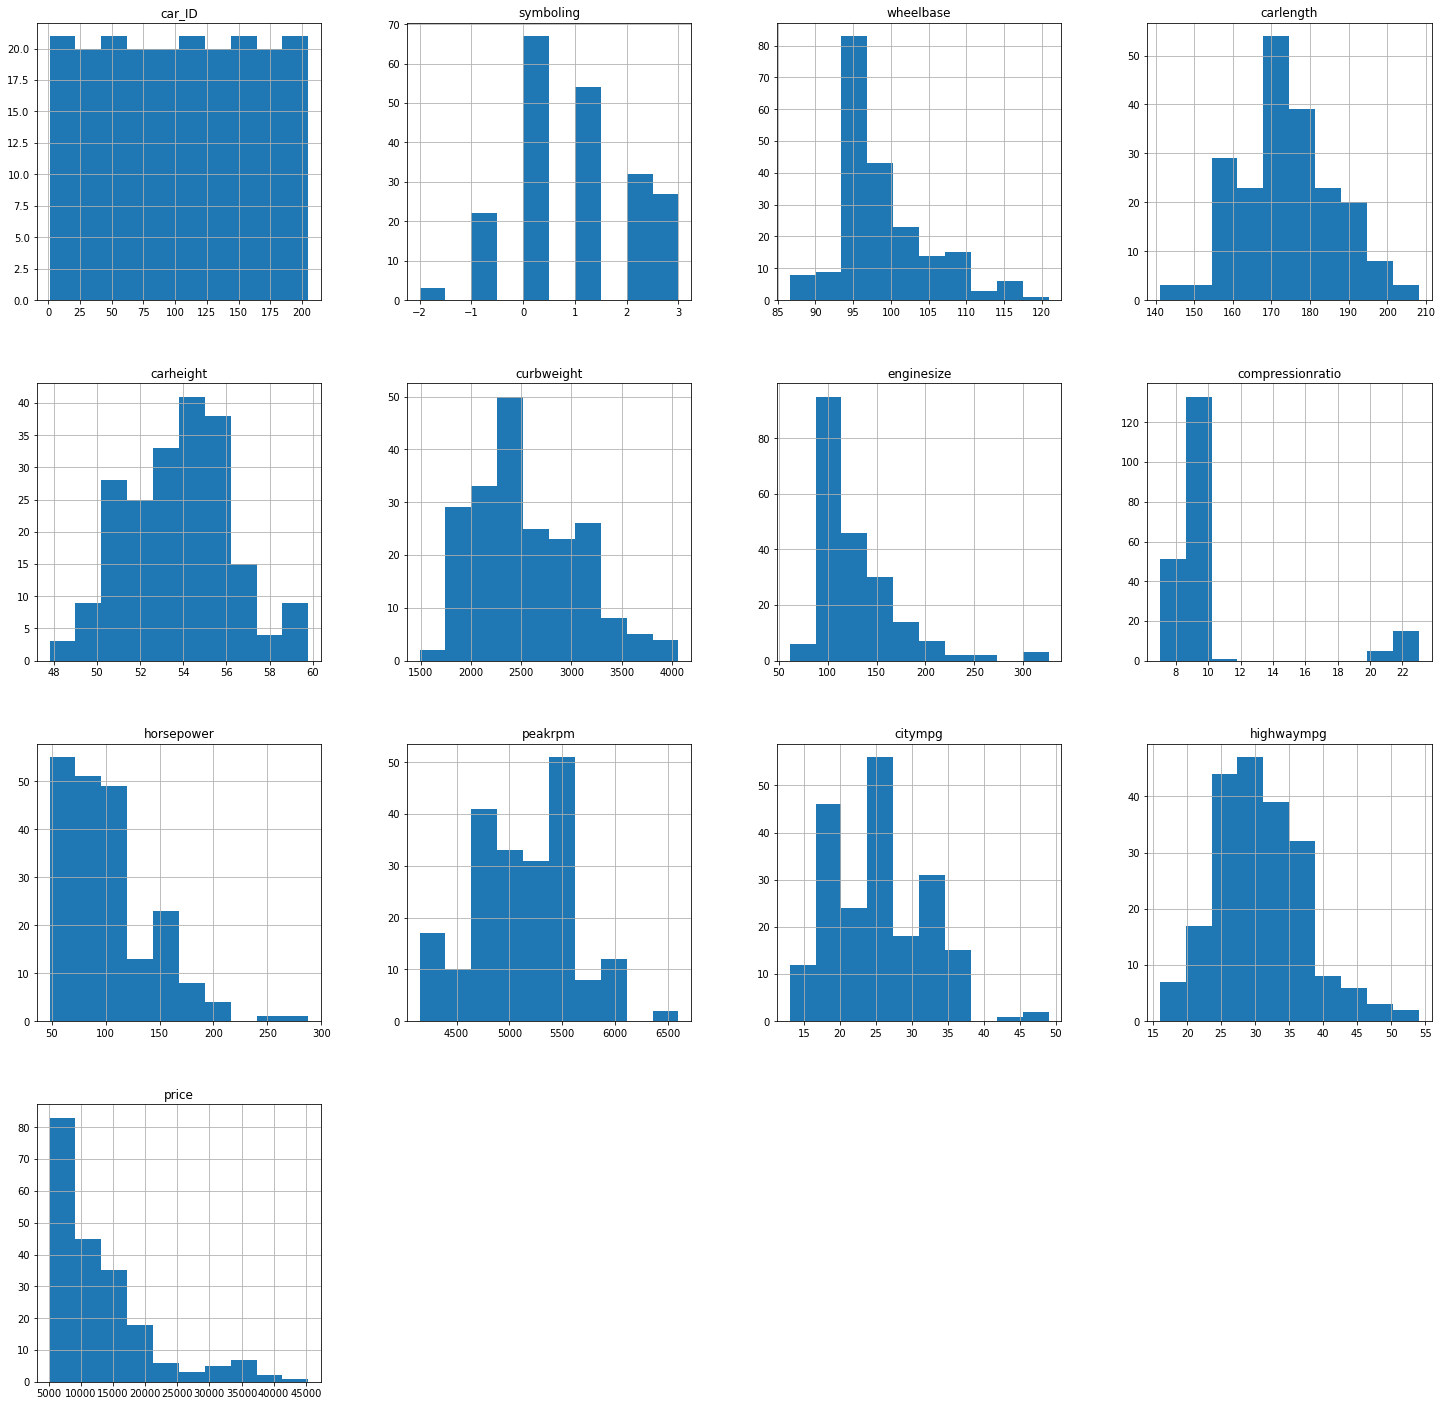

In [21]:
fig = plt.figure(figsize=(25, 25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

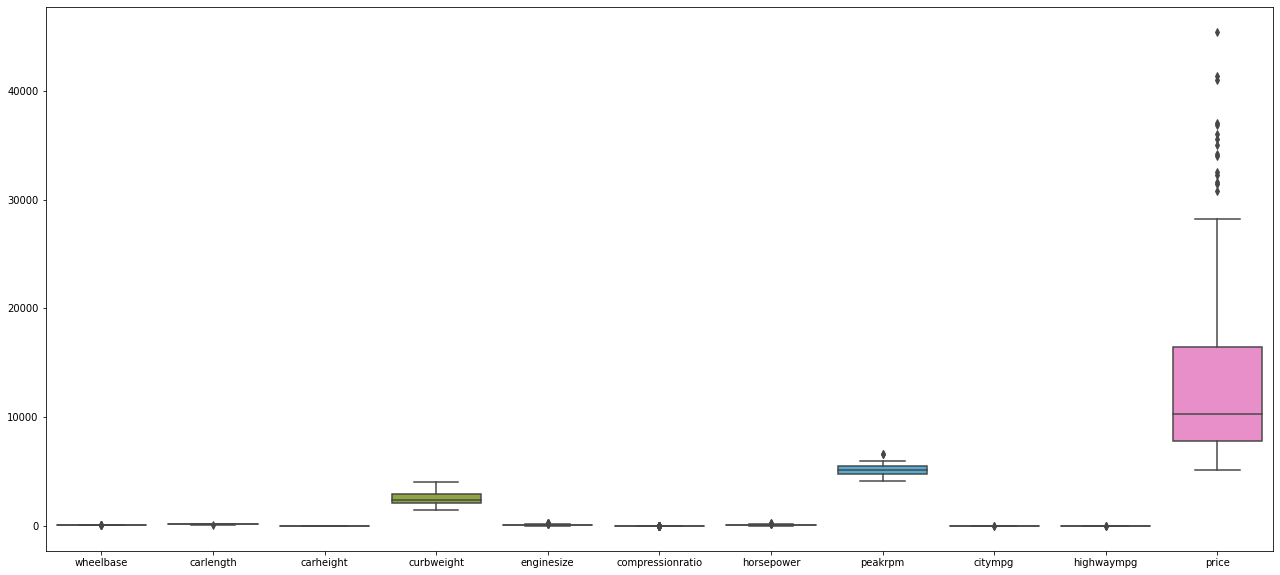

In [22]:
fig = plt.figure(figsize = (22, 10))
sns.boxplot(data = df[con_cols])

Text(0.5, 0, 'Price')

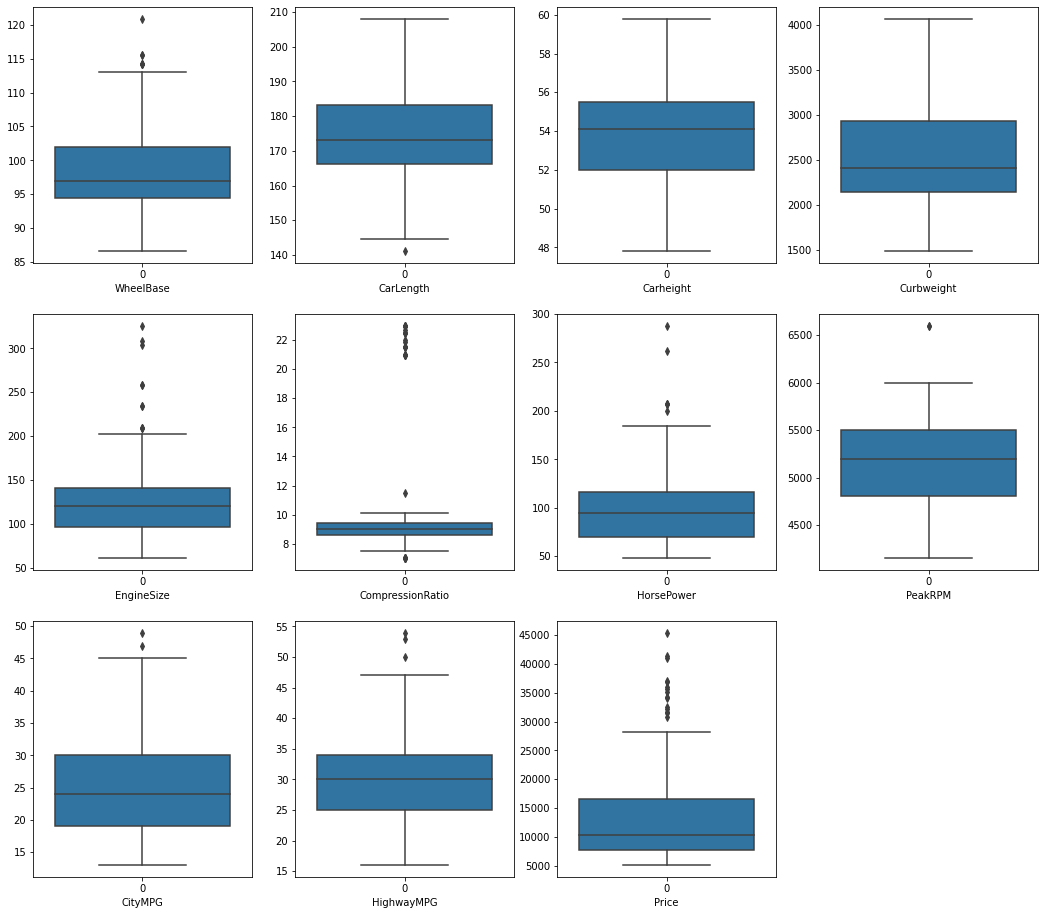

In [23]:
fig = plt.figure(figsize=(18, 16))
gs = fig.add_gridspec(3, 4)

ax0 = fig.add_subplot(gs[0, 0])
sns.boxplot(data  = df['wheelbase'], ax = ax0)
ax0.set_xlabel("WheelBase")

ax1 = fig.add_subplot(gs[0, 1])
sns.boxplot(data  = df['carlength'], ax = ax1)
ax1.set_xlabel("CarLength")


ax2 = fig.add_subplot(gs[0, 2])
sns.boxplot(data  = df['carheight'], ax = ax2)
ax2.set_xlabel("Carheight")

ax3 = fig.add_subplot(gs[0, 3])
sns.boxplot(data  = df['curbweight'], ax = ax3)
ax3.set_xlabel("Curbweight")

ax4 = fig.add_subplot(gs[1, 0])
sns.boxplot(data  = df['enginesize'], ax = ax4)
ax4.set_xlabel("EngineSize")

ax5 = fig.add_subplot(gs[1, 1])
sns.boxplot(data  = df['compressionratio'], ax = ax5)
ax5.set_xlabel("CompressionRatio")

ax6 = fig.add_subplot(gs[1, 2])
sns.boxplot(data  = df['horsepower'], ax = ax6)
ax6.set_xlabel("HorsePower")

ax7 = fig.add_subplot(gs[1, 3])
sns.boxplot(data  = df['peakrpm'], ax = ax7)
ax7.set_xlabel("PeakRPM")

ax8 = fig.add_subplot(gs[2, 0])
sns.boxplot(data  = df['citympg'], ax = ax8)
ax8.set_xlabel("CityMPG")

ax9 = fig.add_subplot(gs[2, 1])
sns.boxplot(data  = df['highwaympg'], ax = ax9)
ax9.set_xlabel("HighwayMPG")

ax10 = fig.add_subplot(gs[2, 2])
sns.boxplot(data  = df['price'], ax = ax10)
ax10.set_xlabel("Price")


In [24]:
df_corr = df.corr().transpose()
df_corr

,car_ID,symboling,wheelbase,carlength,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.137640,0.170636,0.255960,0.071962,-0.033930,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.529078,-0.357612,-0.541038,-0.227691,-0.105790,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.137640,-0.529078,1.000000,0.867192,0.590265,0.768955,0.559553,0.252995,0.343245,-0.364020,-0.463509,-0.538014,0.559838
carlength,0.170636,-0.357612,0.867192,1.000000,0.491029,0.877728,0.683360,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carheight,0.255960,-0.541038,0.590265,0.491029,1.000000,0.295572,0.067149,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.768955,0.877728,0.295572,1.000000,0.850594,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.559553,0.683360,0.067149,0.850594,1.000000,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
compressionratio,0.150276,-0.178515,0.252995,0.158414,0.261214,0.151362,0.028971,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,-0.015006,0.070873,0.343245,0.552623,-0.108802,0.750739,0.809769,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.203789,0.273606,-0.364020,-0.287242,-0.320411,-0.266243,-0.244660,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267


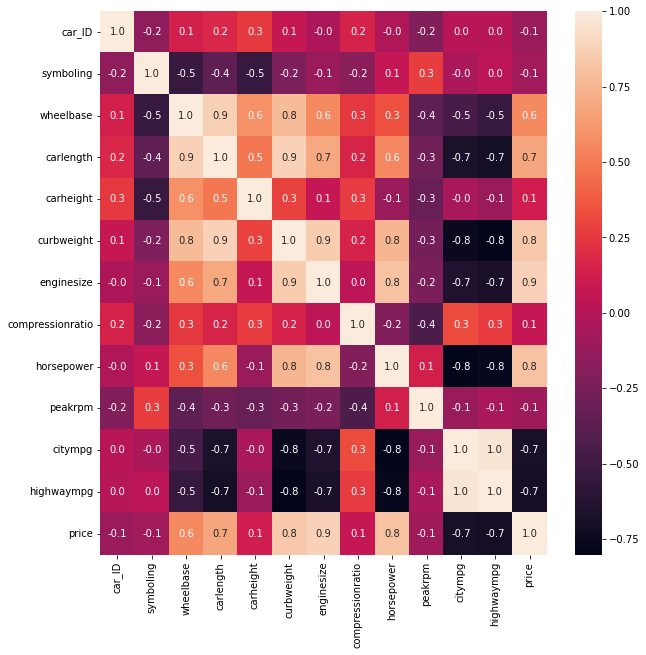

In [25]:
fig = plt.figure(figsize = (10,10))

sns.heatmap(df_corr, fmt=".1f", annot=True)

In [26]:
df.drop("citympg", axis = 1, inplace = True)
con_cols.remove("citympg")

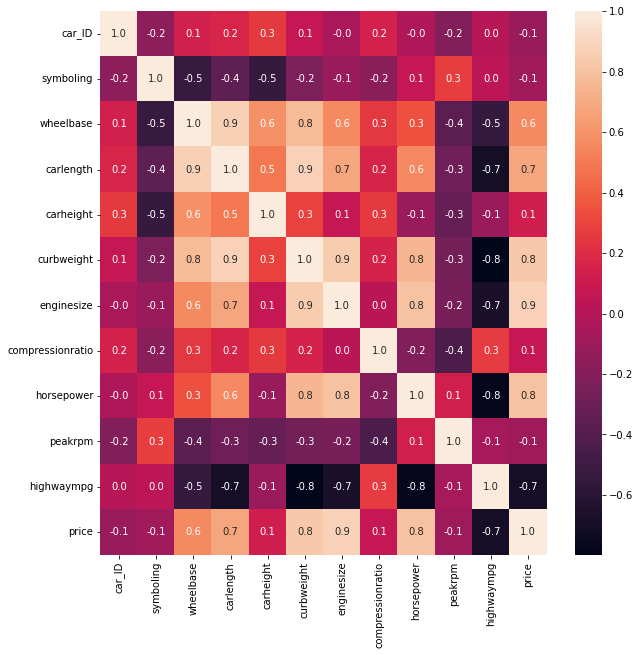

In [27]:
df_corr = df.corr().transpose()
fig = plt.figure(figsize = (10,10))

sns.heatmap(df_corr, fmt=".1f", annot=True)

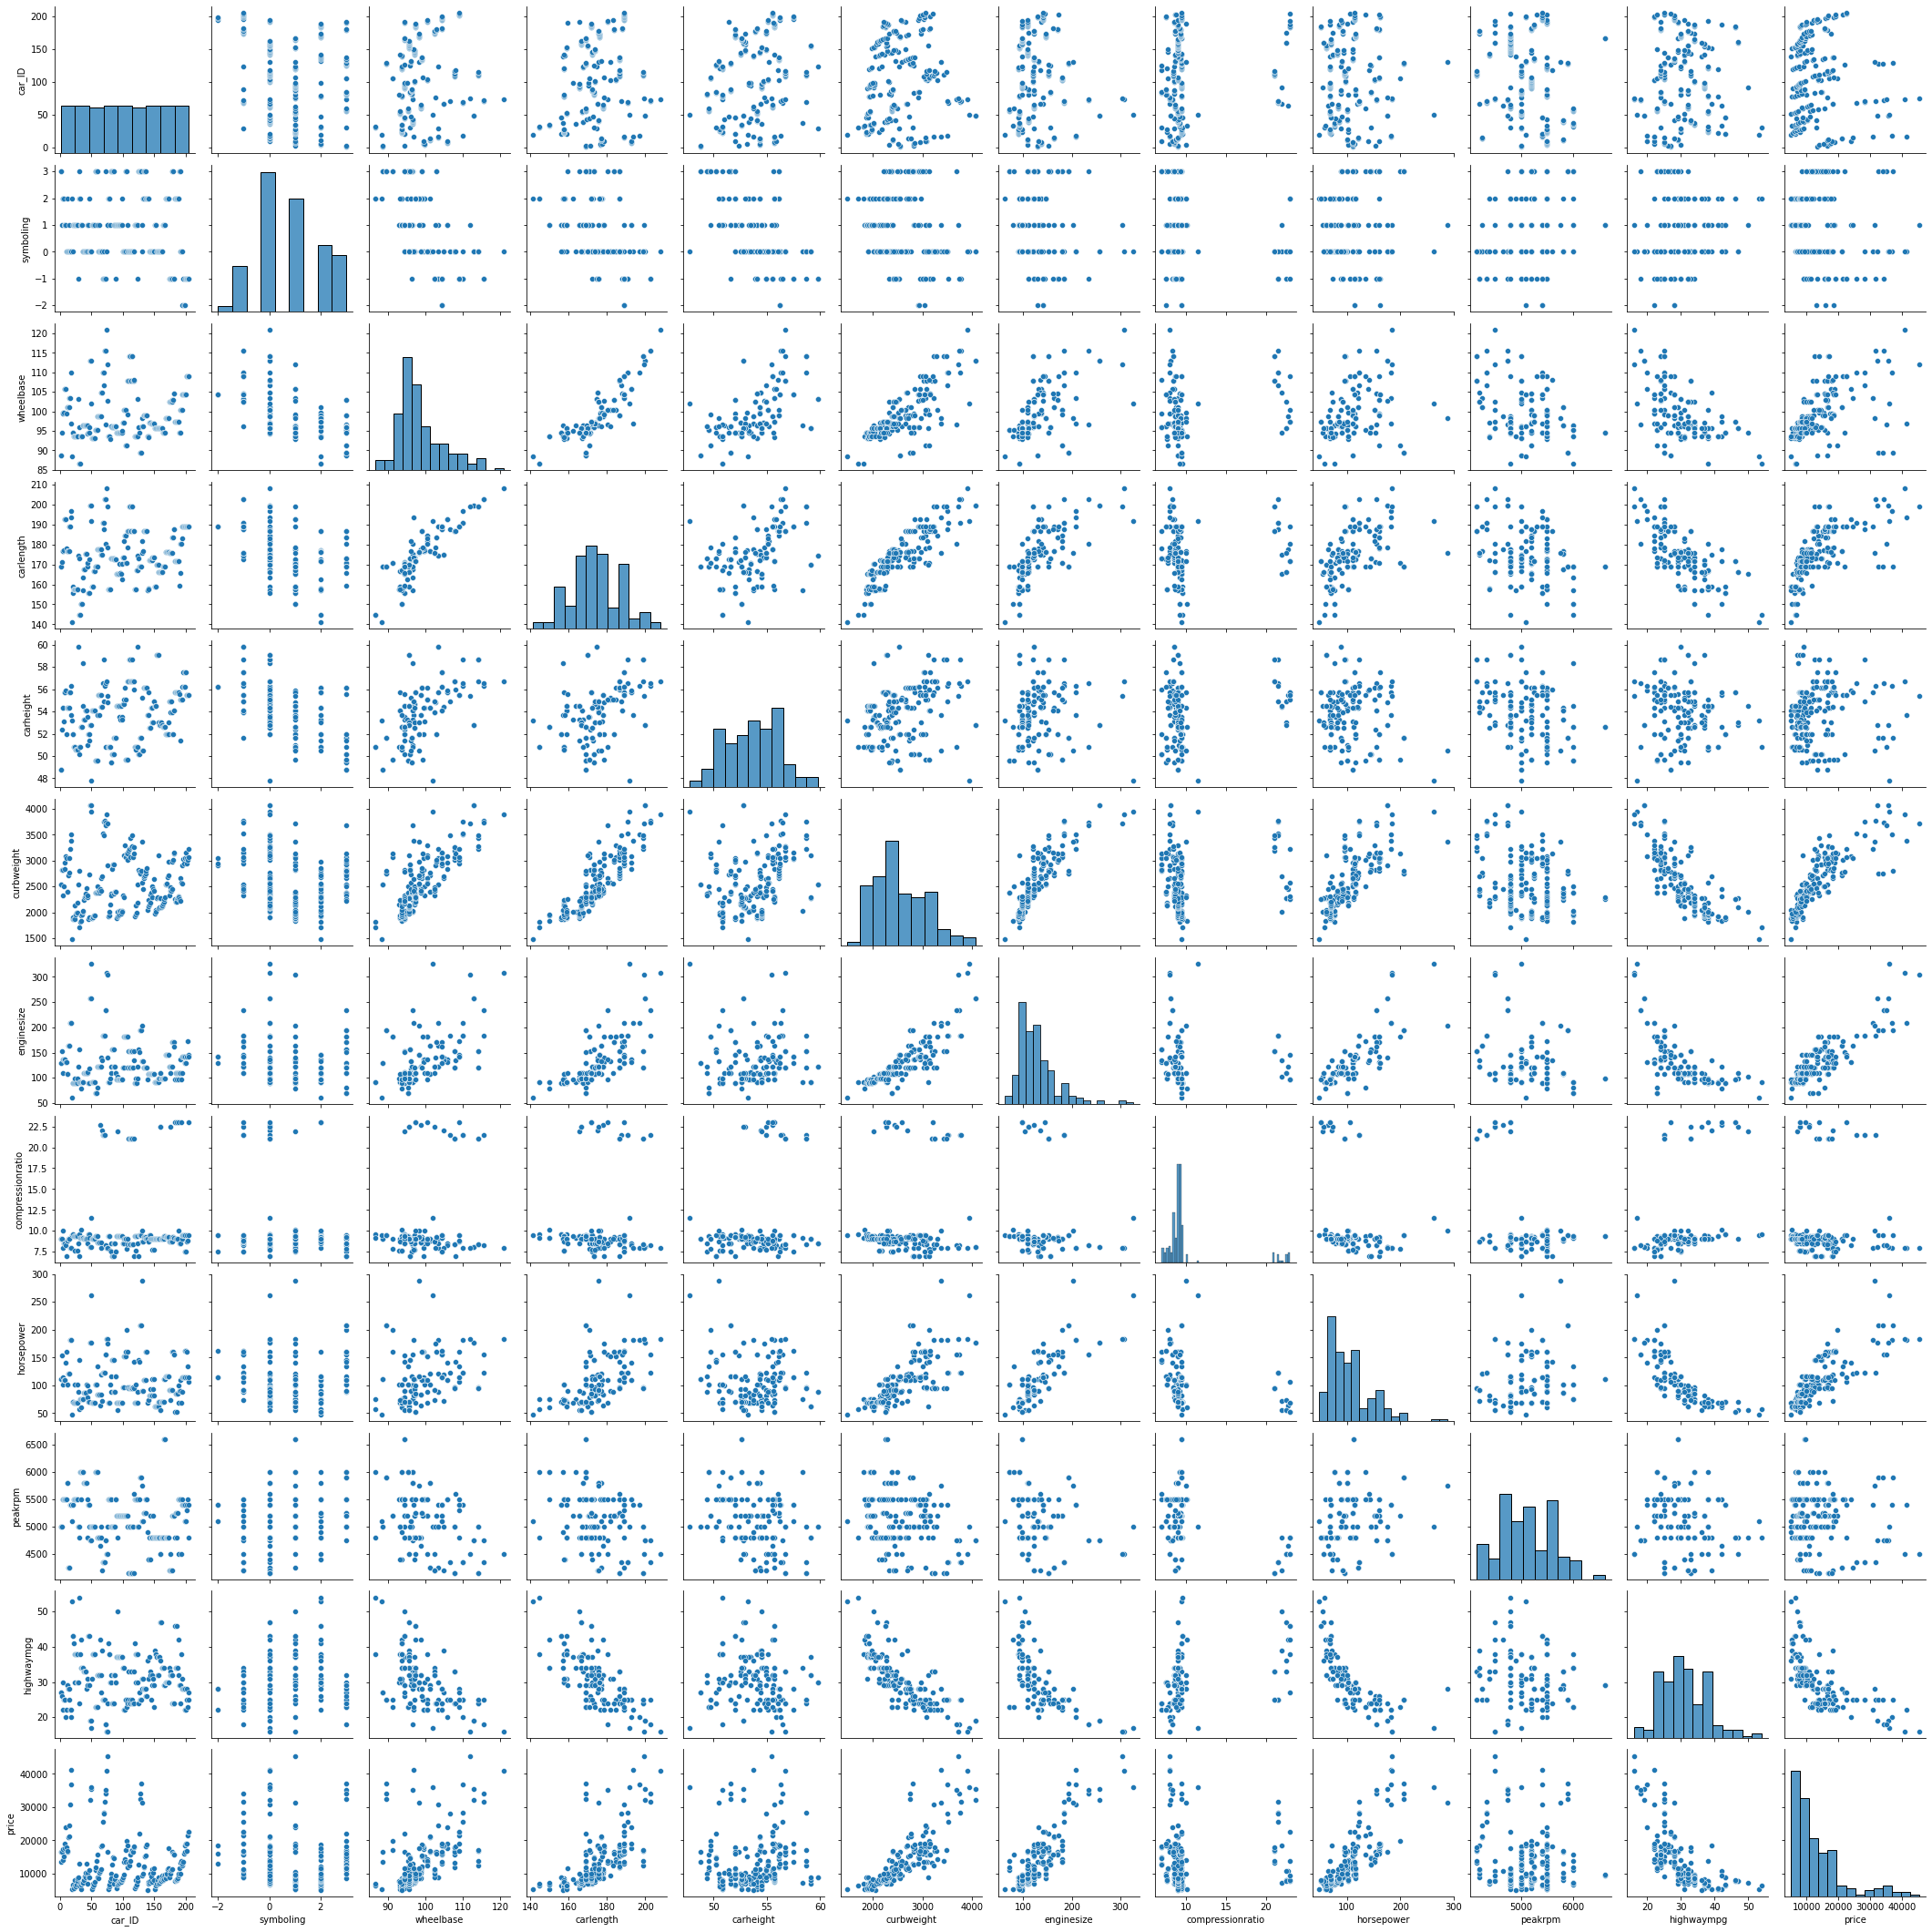

In [29]:
sns.pairplot(data = df, palette="magma")

plt.show()

In [30]:
df1 = df
n2 =df1[con_cols].quantile(0.75)
n1 = df1[con_cols].quantile(0.25)
iqr = n2-n1
lower = n1 - 1.5 * iqr
upper = n2 + 1.5 * iqr

for x in con_cols:
    df1.loc[df[x] < lower[x], x] = lower[x]
    df1.loc[df[x] > upper[x], x] = upper[x]

In [31]:
lower

wheelbase             83.25
carlength            141.10
carheight             46.75
curbweight           960.00
enginesize            31.00
compressionratio       7.40
horsepower             1.00
peakrpm             3750.00
highwaympg            11.50
price              -5284.50
dtype: float64

In [32]:
upper

wheelbase             113.25
carlength             208.30
carheight              60.75
curbweight           4120.00
enginesize            207.00
compressionratio       10.60
horsepower            185.00
peakrpm              6550.00
highwaympg             47.50
price               29575.50
dtype: float64

In [33]:
# cat_cols.remove('output')

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns= cat_cols, drop_first=True)

df1.head()

,car_ID,CarName,wheelbase,carlength,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,alfa-romero giulia,88.6,168.8,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,2,alfa-romero stelvio,88.6,168.8,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero Quadrifoglio,94.5,171.2,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,0
3,4,audi 100 ls,99.8,176.6,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,5,audi 100ls,99.4,176.6,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.preprocessing import PowerTransformer


scaler  = PowerTransformer(method = 'box-cox')

scaler.fit(df1[con_cols])

df1[con_cols] = scaler.transform(df1[con_cols])
# con_cols.remove('price')

In [35]:
df1.drop('car_ID', axis  = 1, inplace = True)
df1.drop("CarName", axis  =  1, inplace = True)

df1

,wheelbase,carlength,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,highwaympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-2.389556,-0.404364,-2.067648,0.144825,0.378388,-0.044174,0.465379,-0.254290,-0.503454,0.472283,...,0,0,0,0,0,0,0,1,0,0
1,-2.389556,-0.404364,-2.067648,0.144825,0.378388,-0.044174,0.465379,-0.254290,-0.503454,0.852504,...,0,0,0,0,0,0,0,1,0,0
2,-0.701681,-0.205728,-0.533347,0.647094,0.937578,-0.044174,1.345489,-0.254290,-0.668008,0.852504,...,0,0,0,0,0,0,0,1,0,0
3,0.373220,0.233457,0.249523,-0.303496,-0.322468,1.211490,0.216713,0.794396,-0.032257,0.537731,...,0,0,0,0,0,0,0,1,0,0
4,0.303277,0.233457,0.249523,0.648777,0.545540,-1.316674,0.566771,0.794396,-1.370560,0.951576,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.625689,1.188734,0.735036,0.856573,0.675866,0.585635,0.541904,0.586179,-0.342791,0.889459,...,0,0,0,0,0,0,0,1,0,0
201,1.625689,1.188734,0.735036,1.004677,0.675866,-0.424059,1.440201,0.377219,-0.836703,1.100783,...,0,0,0,0,0,0,0,1,0,0
202,1.625689,1.188734,0.735036,0.949085,1.359993,-0.297259,0.986993,0.794396,-1.187654,1.295755,...,0,0,0,0,0,0,0,1,0,0
203,1.625689,1.188734,0.735036,1.244120,0.774795,1.957606,0.330983,-0.679339,-0.503454,1.365231,...,0,0,0,0,0,1,0,0,0,0


In [36]:
X = df1.drop('price', axis = 1)
y = df1['price']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [40]:
model.score(X_test, y_test)

0.8405371557287938

In [41]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [42]:
model.score(X_test, y_test)

0.8663386074853886